In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

In [2]:
%matplotlib

Using matplotlib backend: GTK3Agg


In [3]:
donnee = pd.read_csv('../Fichiers/DonneesFumeursv0r2.csv')
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)
stats

,Âge,Cigarettes par jour (week-end),Cigarettes par jour (semaine)
count,1691.000000,1691.000000,1691.000000
mean,49.836192,4.085748,3.423418
std,18.736851,8.643517,7.568341
min,16.000000,0.000000,0.000000
25%,34.000000,0.000000,0.000000
50%,48.000000,0.000000,0.000000
75%,65.500000,0.000000,0.000000
max,97.000000,60.000000,55.000000


In [4]:
donnee.isnull().sum()

Genre                                0
Âge                                  0
Statut                               0
Revenus                            126
Fumeur?                              0
Cigarettes par jour (week-end)       0
Cigarettes par jour (semaine)        0
Type                              1270
dtype: int64

In [5]:
len(donnee[donnee.Revenus.isnull()])

126

In [6]:
donnee.isna().sum()

Genre                                0
Âge                                  0
Statut                               0
Revenus                            126
Fumeur?                              0
Cigarettes par jour (week-end)       0
Cigarettes par jour (semaine)        0
Type                              1270
dtype: int64

In [7]:
dfSansNa = donnee.drop('Type', axis=1)

In [8]:
dfSansNa.isnull().sum()

Genre                               0
Âge                                 0
Statut                              0
Revenus                           126
Fumeur?                             0
Cigarettes par jour (week-end)      0
Cigarettes par jour (semaine)       0
dtype: int64

In [9]:
dfSansNa.dropna(inplace=True)

In [10]:
dfSansNa.describe()

,Âge,Cigarettes par jour (week-end),Cigarettes par jour (semaine)
count,1565.000000,1565.000000,1565.000000
mean,49.609585,4.192332,3.494569
std,18.444783,8.756989,7.669116
min,16.000000,0.000000,0.000000
25%,34.000000,0.000000,0.000000
50%,47.000000,0.000000,0.000000
75%,65.000000,1.000000,0.000000
max,97.000000,60.000000,55.000000


"Génération des histogrammes et fonction de densité"

In [11]:
ax=donnee["Âge"].plot.hist(density=False, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel("Âge")


Text(0.5, 0, 'Âge')

In [12]:

ax=donnee["Âge"].plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel("Âge")
ax.set_ylabel("Probabilités")

Text(38.347222222222214, 0.5, 'Probabilités')

In [13]:
## d = num de segmentos da linha
d=50
grille_x = np.linspace(donnee["Âge"].min()-10, donnee["Âge"].max()+10, d)
dx=(donnee["Âge"].max()+10-(donnee["Âge"].min()-10))/(d-1)
Age_valeurs=donnee["Âge"].values.reshape(-1, 1)
## bandwith: qto maior, mais imprecisa é a linha
kde = KernelDensity(kernel='gaussian', bandwidth=10).fit(Age_valeurs)

TEST=kde.score_samples(grille_x.reshape(-1, 1))
pdf = np.exp(kde.score_samples(grille_x.reshape(-1, 1)))

In [14]:
fig, ax = plt.subplots()
ax=donnee["Âge"].plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel("Âge")
ax.plot(grille_x, pdf, linewidth=3, color = 'red')
ax.set_ylabel("Fonction de densité f(x)")

#print((pdf*dx).sum())

Text(0, 0.5, 'Fonction de densité f(x)')

Cumulativa

In [15]:
fig, ax = plt.subplots()
donnee["Âge"].hist(cumulative=True, density=1, bins=10)
cdf = np.cumsum(pdf*dx)
ax.plot(grille_x, cdf, linewidth=3, color = 'red')
ax.set_xlabel("Âge")
ax.set_ylabel("Fonction cumulative F(x)")

Text(0, 0.5, 'Fonction cumulative F(x)')

In [16]:
grille_x_pd=pd.DataFrame(grille_x)
grille_x_pd.columns=["Âges"]
pdf_pd=pd.DataFrame(pdf)
pdf_pd.columns=["PDF"]
cdf_pd=pd.DataFrame(cdf)
cdf_pd.columns=["CDF"]
DistAge=pd.concat([grille_x_pd,pdf_pd,cdf_pd],axis=1)

In [17]:
Prob_moins_40=DistAge["PDF"][DistAge["Âges"]<=40].sum()*dx

Seaborn

In [18]:
import seaborn as sns
%matplotlib

Using matplotlib backend: GTK3Agg


In [19]:
sns.kdeplot(donnee["Âge"], fill=True, bw_adjust=True)

<AxesSubplot:xlabel='Âge', ylabel='Density'>

In [20]:
import scipy.stats as sts
import statsmodels.api as stm

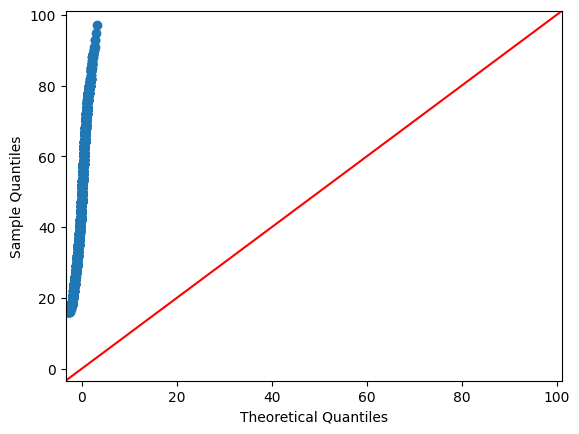

In [23]:
stm.qqplot(dfSansNa['Âge'], line='45')

1000 échantillons, chacun contenant 100 observations

In [ ]:
import random

In [25]:



L=100000
k=100
Moyennes = []

Agevar=donnee["Âge"]
for i in range(L):
    Age_echantillon=random.choices(Agevar,weights=None, k=k)
    Moyennes.append(np.mean(Age_echantillon))

Moyennes_Ages=pd.DataFrame(Moyennes)

ax=Moyennes_Ages.plot.hist(density=True, bins = 100, color = 'blue', edgecolor = 'black')
ax.set_xlabel("Âges moyens (xbarre)")
ax.set_ylabel("Probabilités")

Text(0, 0.5, 'Probabilités')

In [30]:
sts.probplot(Moyennes_Ages[0].values, dist=sts.norm, plot=plt.figure().add_subplot(111))

((array([-4.34602155, -4.14724578, -4.03913009, ...,  4.03913009,
          4.14724578,  4.34602155]),
  array([40.78, 41.53, 41.98, ..., 57.7 , 57.79, 58.66])),
 (1.8758610895939851, 49.8357533, 0.9999773515112762))

In [31]:
sts.probplot(dfSansNa['Âge'].values, dist=sts.norm, plot=plt.figure().add_subplot(111))

((array([-3.32454955, -3.06873687, -2.92656165, ...,  2.92656165,
          3.06873687,  3.32454955]),
  array([16, 16, 16, ..., 93, 95, 97])),
 (18.19613525443093, 49.60958466453675, 0.9849851875256816))